## Training word embedding with help of word2vec
step 1 : load data<br>
step 2 : create Bigrams<br>
step 3 : perform One_hot encoding<br>
step 4 create model and train<br>
step 5 visualize results<br>

In [1]:
 # loading data
file = open("royal_data.txt","r")
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [2]:
for i in range(len(royal_data)):
    royal_data[i]=royal_data[i].lower().replace('\n','')
royal_data

['the future king is the prince',
 'daughter is the princess',
 'son is the prince',
 'only a man can be a king',
 'only a woman can be a queen',
 'the princess will be a queen',
 'the prince is a strong man',
 'the princess is a beautiful woman',
 'prince is only a boy now',
 'prince will be king',
 'a boy will be a man']

## remove stop words and tokenize

In [3]:
stopwords = ['the','is','are','can','will','be','a','only','their','now','and','at','it']
filtered_data = []

for sent in royal_data:
    temp=[]
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


## creating Bigrams   <br>
Bigrams refer to sequences of two adjacent elements in a string of text

In [4]:
bigrams=[]
for word_list in filtered_data: 
    # now from this wordlist we run two forloops to get all P&C
    for i in range(len(word_list)-1):
        for j in range (i+1,len(word_list)):
            bigrams.append([word_list[i],word_list[j]])
            bigrams.append([word_list[j],word_list[i]])
bigrams

[['future', 'king'],
 ['king', 'future'],
 ['future', 'prince'],
 ['prince', 'future'],
 ['king', 'prince'],
 ['prince', 'king'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['prince', 'strong'],
 ['strong', 'prince'],
 ['prince', 'man'],
 ['man', 'prince'],
 ['strong', 'man'],
 ['man', 'strong'],
 ['princess', 'beautiful'],
 ['beautiful', 'princess'],
 ['princess', 'woman'],
 ['woman', 'princess'],
 ['beautiful', 'woman'],
 ['woman', 'beautiful'],
 ['prince', 'boy'],
 ['boy', 'prince'],
 ['prince', 'king'],
 ['king', 'prince'],
 ['boy', 'man'],
 ['man', 'boy']]

## creating vocabulary


In [5]:
all_words =[]
for sent in filtered_data:
    all_words.extend(sent) #  this will concatenate all list
all_words 

['future',
 'king',
 'prince',
 'daughter',
 'princess',
 'son',
 'prince',
 'man',
 'king',
 'woman',
 'queen',
 'princess',
 'queen',
 'prince',
 'strong',
 'man',
 'princess',
 'beautiful',
 'woman',
 'prince',
 'boy',
 'prince',
 'king',
 'boy',
 'man']

## one hot encoding

In [6]:
word_dict={}
counter = 0
for word in all_words:
    word_dict[word]=counter
    counter = counter + 1

word_dict

{'future': 0,
 'king': 22,
 'prince': 21,
 'daughter': 3,
 'princess': 16,
 'son': 5,
 'man': 24,
 'woman': 18,
 'queen': 12,
 'strong': 14,
 'beautiful': 17,
 'boy': 23}

In [8]:
import numpy as np
onehot_data = np.zeros((len(all_words),len(all_words)))
for i in range(len(all_words)):
    onehot_data[i][i] =1
#print(onehot_data)
# now we create onehot_dict that will map the words to it onehot vector
onehot_dict={}
for i in range(len(all_words)):
    onehot_dict[all_words[i]] = onehot_data[i]
for word in onehot_dict:
    print(word ,":", onehot_dict[word])

future : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
king : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0.]
prince : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0.]
daughter : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
son : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
man : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
beautiful : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]
boy : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [15]:
x=[]
y=[]
for bi in bigrams:
    x.append(onehot_dict[bi[0]])
    y.append(onehot_dict[bi[1]])
x=np.array(x)
y=np.array(y)


## Model building

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

vocab_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape=(vocab_size,)))
model.add(Dense(embed_size, activation='linear'))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')

model.fit(x, y, epochs=1000)


Epoch 1/1000
2/2 [==============================] - 1s 10ms/step - loss: 3.2147
Epoch 2/1000
2/2 [==============================] - 0s 6ms/step - loss: 3.2123
Epoch 3/1000
2/2 [==============================] - 0s 7ms/step - loss: 3.2102
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.2083
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 3.2063
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.2043
Epoch 7/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.2024
Epoch 8/1000
2/2 [==============================] - 0s 9ms/step - loss: 3.2006
Epoch 9/1000
2/2 [==============================] - 0s 7ms/step - loss: 3.1987
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 3.1969
Epoch 11/1000
2/2 [==============================] - 0s 7ms/step - loss: 3.1950
Epoch 12/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.1932
Epoch 13/1000
2/2 [=============================

In [45]:
weights = model.get_weights()[0]
word_embedding ={}
for word in all_words:
    word_embedding[word] =weights[word_dict[word]]
for i in all_words:
    print(i,':', word_embedding[i])

future : [-0.5472698 -0.8709853]
king : [-1.0518485 -1.0762612]
prince : [-1.0008209   0.18293737]
daughter : [1.268283   0.01447454]
princess : [0.55017173 0.7403941 ]
son : [-1.0806847  -0.76782864]
prince : [-1.0008209   0.18293737]
man : [-0.62270904 -0.7401444 ]
king : [-1.0518485 -1.0762612]
woman : [1.1593053  0.46761513]
queen : [ 1.1599101  -0.62706625]
princess : [0.55017173 0.7403941 ]
queen : [ 1.1599101  -0.62706625]
prince : [-1.0008209   0.18293737]
strong : [-0.771982   -0.56926566]
man : [-0.62270904 -0.7401444 ]
princess : [0.55017173 0.7403941 ]
beautiful : [ 0.92949575 -0.6019225 ]
woman : [1.1593053  0.46761513]
prince : [-1.0008209   0.18293737]
boy : [-0.804919  -0.7934053]
prince : [-1.0008209   0.18293737]
king : [-1.0518485 -1.0762612]
boy : [-0.804919  -0.7934053]
man : [-0.62270904 -0.7401444 ]


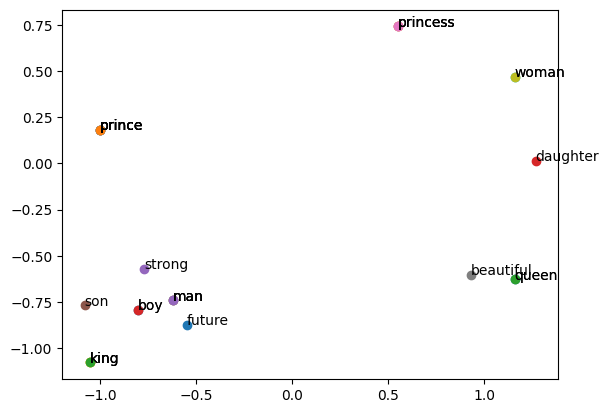

In [46]:
import matplotlib.pyplot as plt
for word in all_words:
    coordinates = word_embedding[word]
    plt.scatter(coordinates[0],coordinates[1])
    #lableing the coordinates
    plt.annotate(word,(coordinates[0],coordinates[1]))